# Build a Question/Answering system over SQL data ( Structured Data )

# 1. Install necessary dependencies

In [2]:
!apt-get update
!apt-get install sqlite3

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,318 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,659 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [1]:
%%capture --no-stderr
%pip install --upgrade --quiet langchain-community langchainhub langgraph

In [3]:
pip install -qU "langchain[openai]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.1/414.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.9 MB/s eta 0:00:00


# 2. Setup Colab environment and Langsmith

This code snippet sets up an environment in Google Colab to create and populate an SQLite database called Chinook.db. It does this by:

Mounting your Google Drive.
Creating a specific directory in your Google Drive to store the database.
Downloading a SQL script from a GitHub repository.
Using the sqlite3 command-line tool to create the database and execute the SQL script, thereby populating the database with data.
This is a typical workflow for setting up a data science environment in Google Colab, where you need to access and create files in your Google Drive and use command-line tools to interact with data.

### Mounts Google Drive

a. from google.colab import drive: Imports the drive module from the google.colab library, which is specific to Google Colaboratory.

b. drive.mount('/content/drive'): This line mounts your Google Drive to the Colab runtime. After executing this, you'll be prompted to authorize Colab to access your Google Drive. Once authorized, your Drive files become accessible within the Colab environment under the /content/drive directory.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Sets up the directory

a. import os: Imports the os module for interacting with the operating system, specifically for file and directory operations.

b. directory_path = '/content/drive/MyDrive/Colab Notebooks/Chinook': Defines the path to a directory within your Google Drive. This is where the SQLite database will be created.

c. if not os.path.exists(directory_path): os.makedirs(directory_path): This checks if the specified directory exists. If it doesn't, it creates the directory and any necessary parent directories. This is important to ensure that the database file can be created in the correct location.

In [5]:
import os

# Path to the directory within your Google Drive
directory_path = '/content/drive/MyDrive/Colab Notebooks/Chinook'

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

### Downloads and Creates the SQLite Database

This line executes a shell command that downloads a SQL script and uses it to create an SQLite database.

In [6]:
!curl -s https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sql | sqlite3 '/content/drive/MyDrive/Colab Notebooks/Chinook/Chinook.db'

### Setup Langsmith to trace

In [9]:
import os
import getpass
# Comment out the below to opt-out of using LangSmith in this notebook. Not required.
if not os.environ.get("LANGSMITH_API_KEY"):
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass()
    os.environ["LANGSMITH_TRACING"] = "true"

··········


### Testing the connection

This code snippet establishes a connection to an SQLite database (Chinook.db) using LangChain's SQLDatabase utility, prints the database dialect and usable table names, and then executes a simple SQL query to retrieve and display the first 20 rows from the Artist table. This demonstrates how to use LangChain to interact with SQL databases and execute SQL queries.

In [10]:
from langchain_community.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook/Chinook.db")
print(db.dialect)
print(db.get_usable_table_names())
db.run("SELECT * FROM Artist LIMIT 20;")

sqlite
['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


"[(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith'), (4, 'Alanis Morissette'), (5, 'Alice In Chains'), (6, 'Antônio Carlos Jobim'), (7, 'Apocalyptica'), (8, 'Audioslave'), (9, 'BackBeat'), (10, 'Billy Cobham'), (11, 'Black Label Society'), (12, 'Black Sabbath'), (13, 'Body Count'), (14, 'Bruce Dickinson'), (15, 'Buddy Guy'), (16, 'Caetano Veloso'), (17, 'Chico Buarque'), (18, 'Chico Science & Nação Zumbi'), (19, 'Cidade Negra'), (20, 'Cláudio Zoli')]"

In [11]:
db.run("SELECT * FROM Album LIMIT 20;")

"[(1, 'For Those About To Rock We Salute You', 1), (2, 'Balls to the Wall', 2), (3, 'Restless and Wild', 2), (4, 'Let There Be Rock', 1), (5, 'Big Ones', 3), (6, 'Jagged Little Pill', 4), (7, 'Facelift', 5), (8, 'Warner 25 Anos', 6), (9, 'Plays Metallica By Four Cellos', 7), (10, 'Audioslave', 8), (11, 'Out Of Exile', 8), (12, 'BackBeat Soundtrack', 9), (13, 'The Best Of Billy Cobham', 10), (14, 'Alcohol Fueled Brewtality Live! [Disc 1]', 11), (15, 'Alcohol Fueled Brewtality Live! [Disc 2]', 11), (16, 'Black Sabbath', 12), (17, 'Black Sabbath Vol. 4 (Remaster)', 12), (18, 'Body Count', 13), (19, 'Chemical Wedding', 14), (20, 'The Best Of Buddy Guy - The Millenium Collection', 15)]"

In [12]:
db.run("SELECT * FROM Customer LIMIT 10;")

"[(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3), (2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5), (3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3), (4, 'Bjørn', 'Hansen', None, 'Ullevålsveien 14', 'Oslo', None, 'Norway', '0171', '+47 22 44 22 22', None, 'bjorn.hansen@yahoo.no', 4), (5, 'František', 'Wichterlová', 'JetBrains s.r.o.', 'Klanova 9/506', 'Prague', None, 'Czech Republic', '14700', '+420 2 4172 5555', '+420 2 4172 5555', 'frantisekw@jetbrains.com', 4), (6, 'Helena', 'Holý', None, 'Rilská 3174/6', 'Prague', None, 'Czech Republic', '14300', '+420 2 4177 0449', None, 'hholy@gmail.com', 5), (7, 'As

# 3. Define the Chain in LangGraph

The sequence of steps :

1. converts the question into a SQL query

2. executes the query

3. uses the result to answer the original question

### a. Define Application State

This code snippet defines a type called State that represents a dictionary with four specific keys: question, query, result, and answer. Each of these keys is expected to have a string value.

Purpose and Usage:

This State type is used to represent the state of the question-answering system. It is  used to store:

question: The original question asked by the user.

query: The modified or processed version of the question used for retrieval or querying.

result: The result obtained from a retrieval system or a database query.
answer: The final answer generated by the system.

By using TypedDict, we can ensure that the data being passed around in your application has the correct structure and types, which can help to prevent errors and improve code readability.

In [13]:
from typing_extensions import TypedDict


class State(TypedDict):
    question: str
    query: str
    result: str
    answer: str

### b. Convert question to SQL query

### Define the Chat model for the application

In [14]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("gpt-4o-mini", model_provider="openai")

Enter API key for OpenAI: ··········


### Reuse a Prompt template defined in Hub

In [15]:
from langchain import hub

query_prompt_template = hub.pull("langchain-ai/sql-query-system-prompt")

assert len(query_prompt_template.messages) == 1
query_prompt_template.messages[0].pretty_print()

================================ System Message ================================

Given an input question, create a syntactically correct {dialect} query to run to help find the answer. Unless the user specifies in his question a specific number of examples they wish to obtain, always limit your query to at most {top_k} results. You can order the results by a relevant column to return the most interesting examples in the database.

Never query for all the columns from a specific table, only ask for a the few relevant columns given the question.

Pay attention to use only the column names that you can see in the schema description. Be careful to not query for columns that do not exist. Also, pay attention to which column is in which table.

Only use the following tables:
{table_info}

Question: {input}


### Define the Utility function

The write_query function takes a user's question, uses a prompt template to create a prompt for an LLM, and then invokes the LLM with structured output to generate an SQL query. The generated SQL query is then returned as a dictionary. The QueryOutput TypedDict is used to enforce the LLM output to always be a valid SQL query, which is very important.

In [16]:
from typing_extensions import Annotated


class QueryOutput(TypedDict):
    """Generated SQL query."""

    query: Annotated[str, ..., "Syntactically valid SQL query."]


def write_query(state: State):
    """Generate SQL query to fetch information."""
    prompt = query_prompt_template.invoke(
        {
            "dialect": db.dialect,
            "top_k": 10,
            "table_info": db.get_table_info(),
            "input": state["question"],
        }
    )
    structured_llm = llm.with_structured_output(QueryOutput)
    result = structured_llm.invoke(prompt)
    return {"query": result["query"]}

In [17]:
write_query({"question": "How many Employees are there?"})

{'query': 'SELECT COUNT(*) AS TotalEmployees FROM Employee;'}

### c. Execute query

This code snippet defines a function execute_query that takes an SQL query as input, creates a QuerySQLDatabaseTool object, and executes the query against the database. The result of the query is then returned as a dictionary. The last line of code directly calls the function with a query to count the employees. Effectively, this code allows you to programmatically execute SQL queries using LangChain.

In [18]:
from langchain_community.tools.sql_database.tool import QuerySQLDatabaseTool


def execute_query(state: State):
    """Execute SQL query."""
    execute_query_tool = QuerySQLDatabaseTool(db=db)
    return {"result": execute_query_tool.invoke(state["query"])}

In [19]:
execute_query({"query": "SELECT COUNT(EmployeeId) AS EmployeeCount FROM Employee;"})

{'result': '[(8,)]'}

### d. Generate answer

The generate_answer function takes a State object, which contains the question, query, and result. It then constructs a prompt that includes all of these pieces of information. This prompt is then sent to an LLM, which generates a natural language answer based on the provided context. The resulting answer is then returned in a dictionary. This function essentially acts as a post-processing step, taking the raw results of a database query and making them more user-friendly.

In [20]:
def generate_answer(state: State):
    """Answer question using retrieved information as context."""
    prompt = (
        "Given the following user question, corresponding SQL query, "
        "and SQL result, answer the user question.\n\n"
        f'Question: {state["question"]}\n'
        f'SQL Query: {state["query"]}\n'
        f'SQL Result: {state["result"]}'
    )
    response = llm.invoke(prompt)
    return {"answer": response.content}

# 4. Orchestrating the Chain with LangGraph

### Define the Graph

This code snippet creates a LangGraph that represents a workflow for answering questions using a database. The workflow consists of three steps:

write_query: Generates an SQL query based on the user's question.

execute_query: Executes the generated SQL query against the database.

generate_answer: Generates a natural language answer based on the query result.

The StateGraph class is used to define the graph structure, and the add_sequence() and add_edge() methods are used to add nodes and edges to the graph.

Finally, the compile() method is used to create an executable graph object.

In [21]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence(
    [write_query, execute_query, generate_answer]
)
graph_builder.add_edge(START, "write_query")
graph = graph_builder.compile()

### Visualize the Graph

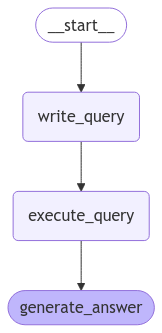

In [22]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

### Invoking the Graph

In [23]:
for step in graph.stream(
    {"question": "How many employees are there?"}, stream_mode="updates"
):
    print(step)

{'write_query': {'query': 'SELECT COUNT(*) AS NumberOfEmployees FROM Employee;'}}
{'execute_query': {'result': '[(8,)]'}}
{'generate_answer': {'answer': 'There are 8 employees.'}}


### Update the Graph by Adding Human-in-the-loop as part of the workflow

In [24]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory, interrupt_before=["execute_query"])

# Now that we're using persistence, we need to specify a thread ID
# so that we can continue the run after review.
config = {"configurable": {"thread_id": "1"}}

### Visualize the Graph

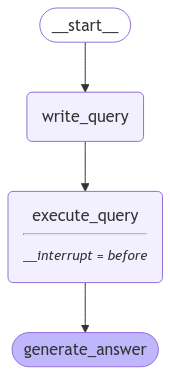

In [25]:
display(Image(graph.get_graph().draw_mermaid_png()))

### Invoke the Graph and say yes as parameter in runtime

In [26]:
for step in graph.stream(
    {"question": "How many employees are there?"},
    config,
    stream_mode="updates",
):
    print(step)

try:
    user_approval = input("Do you want to go to execute query? (yes/no): ")
except Exception:
    user_approval = "no"

if user_approval.lower() == "yes":
    # If approved, continue the graph execution
    for step in graph.stream(None, config, stream_mode="updates"):
        print(step)
else:
    print("Operation cancelled by user.")

{'write_query': {'query': 'SELECT COUNT(*) AS NumberOfEmployees FROM Employee;'}}
{'__interrupt__': ()}
Do you want to go to execute query? (yes/no): yes
{'execute_query': {'result': '[(8,)]'}}
{'generate_answer': {'answer': 'There are 8 employees.'}}


### Invoke the Graph and say no as parameter in runtime

In [27]:
for step in graph.stream(
    {"question": "How many employees are there?"},
    config,
    stream_mode="updates",
):
    print(step)

try:
    user_approval = input("Do you want to go to execute query? (yes/no): ")
except Exception:
    user_approval = "no"

if user_approval.lower() == "yes":
    # If approved, continue the graph execution
    for step in graph.stream(None, config, stream_mode="updates"):
        print(step)
else:
    print("Operation cancelled by user.")

{'write_query': {'query': 'SELECT COUNT(*) AS EmployeeCount FROM Employee;'}}
{'__interrupt__': ()}
Do you want to go to execute query? (yes/no): no
Operation cancelled by user.


Observation : When you pass 'no' runtime , it will not execute the query and abort the operation , that's how you can control the execution

# 5. Define Agents to perform the same action

Agents leverage the reasoning capabilities of LLMs to make decisions during execution. Using agents allows you to offload additional discretion over the query generation and execution process. Although their behavior is less predictable than the above "chain", they feature some advantages:

a. They can query the database as many times as needed to answer the user question.

b. They can recover from errors by running a generated query, catching the traceback and regenerating it correctly.

c. They can answer questions based on the databases' schema as well as on the databases' content (like describing a specific table).

### tools

The SQLDatabaseToolkit typically provides tools like:

QuerySQLDatabaseTool: To execute SQL queries against the database.
ListTablesSQLDatabaseTool: To list the tables in the database.
DescribeTableSQLDatabaseTool: To get information about a specific table's schema.
These tools allow a LangChain agent to interact with a SQL database in a structured and controlled manner. The agent can use these tools to:

Understand the database schema.
Generate and execute SQL queries.
Retrieve and process the results of queries.
In summary:

This code snippet creates an SQLDatabaseToolkit object, which provides a set of tools for interacting with a SQL database. It then retrieves these tools and displays them. This is a common step when you want to use a LangChain agent to interact with a database.

In [28]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=db, llm=llm)

tools = toolkit.get_tools()

tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7a11ec0cb810>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7a11ec0cb810>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7a11ec0cb810>),
 QuerySQLCheckerTool(description='Use this tool to double check

### Reuse a Prompt template defined in Hub

In [29]:
from langchain import hub

prompt_template = hub.pull("langchain-ai/sql-agent-system-prompt")

assert len(prompt_template.messages) == 1
prompt_template.messages[0].pretty_print()

================================ System Message ================================

You are an agent designed to interact with a SQL database.
Given an input question, create a syntactically correct {dialect} query to run, then look at the results of the query and return the answer.
Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most {top_k} results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.
You have access to tools for interacting with the database.
Only use the below tools. Only use the information returned by the below tools to construct your final answer.
You MUST double check your query before executing it. If you get an error while executing a query, rewrite the query and try again.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to th

In [30]:
system_message = prompt_template.format(dialect="SQLite", top_k=5)

### Initializing the agent

In [32]:
from langchain_core.messages import HumanMessage
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(llm, tools, prompt=system_message)

### Invoking the agent

Query 1 : Expecting Quantitative output

In [33]:
question = "Which country's customers spent the most?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Which country's customers spent the most?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_zHVGdVEy1gYyFTtMPfjsTe8Y)
 Call ID: call_zHVGdVEy1gYyFTtMPfjsTe8Y
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_mxJ2ojNdESiGDlt76v8kgrrz)
 Call ID: call_mxJ2ojNdESiGDlt76v8kgrrz
  Args:
    table_names: Customer
  sql_db_schema (call_96Zu1tY7P4dGfPhGzBG9E4tc)
 Call ID: call_96Zu1tY7P4dGfPhGzBG9E4tc
  Args:
    table_names: Invoice
  sql_db_schema (call_EbBpBlKMt8ZGcAuH2oTpO2KC)
 Call ID: call_EbBpBlKMt8ZGcAuH2oTpO2KC
  Args:
    table_names: InvoiceLine
========

## Output explanation

Note that the agent executes multiple queries until it has the information it needs:

1. List available tables
2. Retrieves the schema for three tables
3. Queries multiple of the tables via a join operation.

The agent is then able to use the result of the final query to generate an answer to the original question.


This output demonstrates the execution of a LangChain agent designed to answer questions about a SQL database, specifically the Chinook database, using a series of tools. Let's break down the process step by step:

1. User Question:

================================ Human Message =================================

Which country's customers spent the most?

The user initiates the conversation by asking a question that requires information from the database.

2. Agent's Tool Selection (List Tables):

================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_zHVGdVEy1gYyFTtMPfjsTe8Y)
 Call ID: call_zHVGdVEy1gYyFTtMPfjsTe8Y
  Args:

The agent begins by using the sql_db_list_tables tool. This is a common first step for an agent interacting with a database, as it needs to understand the available tables.

3. Tool Output (List Tables):

================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track

The sql_db_list_tables tool returns a list of table names in the Chinook database.

4. Agent's Tool Selection (Schema Inspection):

================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_mxJ2ojNdESiGDlt76v8kgrrz)
 Call ID: call_mxJ2ojNdESiGDlt76v8kgrrz
  Args:
    table_names: Customer
  sql_db_schema (call_96Zu1tY7P4dGfPhGzBG9E4tc)
 Call ID: call_96Zu1tY7P4dGfPhGzBG9E4tc
  Args:
    table_names: Invoice
  sql_db_schema (call_EbBpBlKMt8ZGcAuH2oTpO2KC)
 Call ID: call_EbBpBlKMt8ZGcAuH2oTpO2KC
  Args:
    table_names: InvoiceLine

The agent then uses the sql_db_schema tool to inspect the schemas of the Customer, Invoice, and InvoiceLine tables. This is crucial for understanding the relationships between tables and the available columns.

5. Tool Output (Schema Inspection):

================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "InvoiceLine" (
        "InvoiceLineId" INTEGER NOT NULL,
        "InvoiceId" INTEGER NOT NULL,
        "TrackId" INTEGER NOT NULL,
        "UnitPrice" NUMERIC(10, 2) NOT NULL,
        "Quantity" INTEGER NOT NULL,
        PRIMARY KEY ("InvoiceLineId"),
        FOREIGN KEY("TrackId") REFERENCES "Track" ("TrackId"),
        FOREIGN KEY("InvoiceId") REFERENCES "Invoice" ("InvoiceId")
)

/*
3 rows from InvoiceLine table:
InvoiceLineId       InvoiceId       TrackId UnitPrice       Quantity
1       1       2       0.99    1
2       1       4       0.99    1
3       2       6       0.99    1
*/

The tool returns the schema definition for the InvoiceLine table. This shows the columns, data types, primary keys, and foreign keys. The agent receives similar schema information for the other requested tables.

6. Agent's Tool Selection (Query Checker):

================================== Ai Message ==================================
Tool Calls:
  sql_db_query_checker (call_4rILDDOkGmACj7SBEIEc82eb)
 Call ID: call_4rILDDOkGmACj7SBEIEc82eb
  Args:
    query: SELECT c.Country, SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.Country
ORDER BY TotalSpent DESC
LIMIT 5;

The agent uses the sql_db_query_checker tool to validate the generated SQL query. This is a safety measure to prevent potentially harmful or incorrect queries from being executed.

7. Tool Output (Query Checker):

================================= Tool Message =================================
Name: sql_db_query_checker

```sql
SELECT c.Country, SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.Country
ORDER BY TotalSpent DESC
LIMIT 5;

The tool returns the validated SQL query.

8. Agent's Tool Selection (Execute Query):

================================== Ai Message ==================================
Tool Calls:
  sql_db_query (call_Lm4l87F5JZHPHOkVxOLKnVVi)
 Call ID: call_Lm4l87F5JZHPHOkVxOLKnVVi
  Args:
    query: SELECT c.Country, SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.Country
ORDER BY TotalSpent DESC
LIMIT 5;

The agent executes the validated SQL query using the sql_db_query tool.

9. Tool Output (Execute Query):

================================= Tool Message =================================
Name: sql_db_query

[('USA', 523.0600000000003), ('Canada', 303.9599999999999), ('France', 195.09999999999994), ('Brazil', 190.09999999999997), ('Germany', 156.48)]
The tool returns the results of the SQL query, which are the countries and their total spending.

10. Agent's Final Answer:

================================== Ai Message ==================================

The countries whose customers spent the most are:

1. **USA** - $523.06
2. **Canada** - $303.96
3. **France** - $195.10
4. **Brazil** - $190.10
5. **Germany** - $156.48

The agent formats the results of the query into a natural language answer and presents it to the user.

Summary:

This output demonstrates the step-by-step process of a LangChain agent interacting with a SQL database to answer a user's question. The agent uses a series of tools to:

1. Understand the database schema.
2. Generate and validate an SQL query.
3. Execute the query.
4. Format the results into a natural language answer.

Query 2 : Expecting Qualitative output

In [34]:
question = "Describe the playlisttrack table"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Describe the playlisttrack table
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_XMmJLUo6sjlLKgmd8yQAdzMY)
 Call ID: call_XMmJLUo6sjlLKgmd8yQAdzMY
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_TeeBQIF2z9xvP0ngptmk1hIP)
 Call ID: call_TeeBQIF2z9xvP0ngptmk1hIP
  Args:
    table_names: PlaylistTrack
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "PlaylistTrack" (
	"PlaylistId" INTEGER NOT NULL, 
	"TrackId" INTEGER NOT NULL, 
	PRIMARY KEY ("PlaylistId", "TrackId"), 
	FOREIGN KEY("TrackI

Query 3

In [35]:
question = "Which city's customers spent the most?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Which city's customers spent the most?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_u9Vl15FYPBoApHmJy7D410ET)
 Call ID: call_u9Vl15FYPBoApHmJy7D410ET
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_LX14hyf0T0hrKPaTmgdNS2jy)
 Call ID: call_LX14hyf0T0hrKPaTmgdNS2jy
  Args:
    table_names: Customer
  sql_db_schema (call_pHqPkZoUHfwjcMD8eKArVEsz)
 Call ID: call_pHqPkZoUHfwjcMD8eKArVEsz
  Args:
    table_names: Invoice
  sql_db_schema (call_5hp5B1KJmZ8Hc4XrQmMsFzMN)
 Call ID: call_5hp5B1KJmZ8Hc4XrQmMsFzMN
  Args:
    table_names: InvoiceLine
===========

Query 4

In [36]:
question = "Total number of unique customers we have?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Total number of unique customers we have?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_L8BgG6llDR2hDB8rcyiqfTrW)
 Call ID: call_L8BgG6llDR2hDB8rcyiqfTrW
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_u7df4QWmDiOMxLVc5s9z1sks)
 Call ID: call_u7df4QWmDiOMxLVc5s9z1sks
  Args:
    table_names: Customer
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Customer" (
	"CustomerId" INTEGER NOT NULL, 
	"FirstName" NVARCHAR(40) NOT NULL, 
	"LastName" NVARCHAR(20) NOT NULL, 
	"Company" NVARCHAR

Query 5

In [37]:
question = "Total number of unique genre's  we have?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Total number of unique genre's  we have?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_O6sdkvXY00iYRA1lhqylBwkZ)
 Call ID: call_O6sdkvXY00iYRA1lhqylBwkZ
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_5ppIjlqD66C4LL3TA8xu76rt)
 Call ID: call_5ppIjlqD66C4LL3TA8xu76rt
  Args:
    table_names: Genre
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Genre" (
	"GenreId" INTEGER NOT NULL, 
	"Name" NVARCHAR(120), 
	PRIMARY KEY ("GenreId")
)

/*
3 rows from Genre table:
GenreId	Name
1	Rock
2	

Query 6

In [38]:
question = "Total number of unique mediatype's and their names  we have?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Total number of unique mediatype's and their names  we have?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_2j9goPK95cTdG8TJwIOu092K)
 Call ID: call_2j9goPK95cTdG8TJwIOu092K
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_PIjDjdcPV2cOABnYrQpCAe3h)
 Call ID: call_PIjDjdcPV2cOABnYrQpCAe3h
  Args:
    table_names: MediaType
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "MediaType" (
	"MediaTypeId" INTEGER NOT NULL, 
	"Name" NVARCHAR(120), 
	PRIMARY KEY ("MediaTypeId")
)

/*
3 rows from

Query 7

In [39]:
question = "Who were the composers of 'Breaking The Rules' and what genre it falls ?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Who were the composers of 'Breaking The Rules' and what genre it falls ?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_b7f91HwrCRrnhgT3aDAKqynj)
 Call ID: call_b7f91HwrCRrnhgT3aDAKqynj
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_pI2wxpo3hLvgvAo1c0sS1teh)
 Call ID: call_pI2wxpo3hLvgvAo1c0sS1teh
  Args:
    table_names: Track
  sql_db_schema (call_y0kEqgGBdeO7aj5vXVptXCIJ)
 Call ID: call_y0kEqgGBdeO7aj5vXVptXCIJ
  Args:
    table_names: Artist
  sql_db_schema (call_qpKmtwfWNJhOH65pDYENCd5h)
 Call ID: call_qpKmtwfWNJhOH65pDYENCd5h
  Args:
    table_

Query 8

In [40]:
question = "Who were the composers of 'Life During Wartime' and what genre it falls ?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Who were the composers of 'Life During Wartime' and what genre it falls ?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_USQvpl732mrHOrGwMJD8QRTM)
 Call ID: call_USQvpl732mrHOrGwMJD8QRTM
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_NVeVx6aAzNJMILKcCUGwBMjk)
 Call ID: call_NVeVx6aAzNJMILKcCUGwBMjk
  Args:
    table_names: Track
  sql_db_schema (call_1njJmaMOVTn8LWQqCkqt5LhH)
 Call ID: call_1njJmaMOVTn8LWQqCkqt5LhH
  Args:
    table_names: Artist
  sql_db_schema (call_lGONLQzvwAeGO6Ag65OFFwav)
 Call ID: call_lGONLQzvwAeGO6Ag65OFFwav
  Args:
    table

Query 9

In [41]:
question = "Total number of unique tracks?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Total number of unique tracks?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_Qfs9uCLauQ83RJVJ1opUV6qs)
 Call ID: call_Qfs9uCLauQ83RJVJ1opUV6qs
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_bm5qvLjvvmUZAYlw2fA0uoxD)
 Call ID: call_bm5qvLjvvmUZAYlw2fA0uoxD
  Args:
    table_names: Track
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Track" (
	"TrackId" INTEGER NOT NULL, 
	"Name" NVARCHAR(200) NOT NULL, 
	"AlbumId" INTEGER, 
	"MediaTypeId" INTEGER NOT NULL, 
	"GenreId" INTEGER, 
	"C

Query 10

In [42]:
question = "How many employees work as sales support agent , their names , mail id's and phone numbers?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

How many employees work as sales support agent , their names , mail id's and phone numbers?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_SMSmToCn1bo0TyufPxHBtzT3)
 Call ID: call_SMSmToCn1bo0TyufPxHBtzT3
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_BSoS010hV0Q27kDLR3XIa8kH)
 Call ID: call_BSoS010hV0Q27kDLR3XIa8kH
  Args:
    table_names: Employee
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Employee" (
	"EmployeeId" INTEGER NOT NULL, 
	"LastName" NVARCHAR(20) NOT NULL, 
	"Firs

Query 11

In [43]:
question = "List down uniqe number of customers by city and country?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

List down uniqe number of customers by city and country?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_hU12oKyDZAwz0cKPPHoXYF2O)
 Call ID: call_hU12oKyDZAwz0cKPPHoXYF2O
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_PYPA3GBHlYIxmolN96EeiNAM)
 Call ID: call_PYPA3GBHlYIxmolN96EeiNAM
  Args:
    table_names: Customer
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Customer" (
	"CustomerId" INTEGER NOT NULL, 
	"FirstName" NVARCHAR(40) NOT NULL, 
	"LastName" NVARCHAR(20) NOT NULL, 
	"Co

Query 12

In [45]:
question = "Do we have customers named 'Johannes' and 'arijit'?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Do we have customers named 'Johannes' and 'arijit'?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_C3fBscRpebzLnPFAATIAgolP)
 Call ID: call_C3fBscRpebzLnPFAATIAgolP
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_query_checker (call_MkHEKT8WQDYoLDlJ5BWS1q5R)
 Call ID: call_MkHEKT8WQDYoLDlJ5BWS1q5R
  Args:
    query: SELECT COUNT(*) FROM Customer WHERE Name = 'Johannes'
  sql_db_query_checker (call_DloQGLRHAzDSBFc7eSSntWIT)
 Call ID: call_DloQGLRHAzDSBFc7eSSntWIT
  Args:
    query: SELECT COUNT(*) FROM Customer WHERE Name = 'arijit'
================================

query 13

In [46]:
question = "List down unique number of customers by countries ?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

List down unique number of customers by countries ?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_Y2eQ95mqYsqCB4LMcTdMHSRS)
 Call ID: call_Y2eQ95mqYsqCB4LMcTdMHSRS
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_KxXbZx3eVnkfKRZpgpXHHdrg)
 Call ID: call_KxXbZx3eVnkfKRZpgpXHHdrg
  Args:
    table_names: Customer
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Customer" (
	"CustomerId" INTEGER NOT NULL, 
	"FirstName" NVARCHAR(40) NOT NULL, 
	"LastName" NVARCHAR(20) NOT NULL, 
	"Company

Query 14

In [47]:
question = "How many times puja is billed and what are the Dates ?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

How many times puja is billed and what are the Dates ?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_S3w2giOb5L8O4bB3rjHhL3ad)
 Call ID: call_S3w2giOb5L8O4bB3rjHhL3ad
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_x2af5uZDHeDsr4sI52SaiFdF)
 Call ID: call_x2af5uZDHeDsr4sI52SaiFdF
  Args:
    table_names: Invoice
  sql_db_schema (call_woI0BMUQOgeNLiGImb5NBqWq)
 Call ID: call_woI0BMUQOgeNLiGImb5NBqWq
  Args:
    table_names: Customer
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Cus

Query 15

In [48]:
question = "How many times Hannah is billed and what are the Dates ?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

How many times Hannah is billed and what are the Dates ?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_o711TcGQZcbo3fUmmYmPdM0m)
 Call ID: call_o711TcGQZcbo3fUmmYmPdM0m
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_ILQdV8KPOuxreexK4Y2RqdO1)
 Call ID: call_ILQdV8KPOuxreexK4Y2RqdO1
  Args:
    table_names: Customer
  sql_db_schema (call_LFgu2ac2QTlJJgUnwS3m9v0r)
 Call ID: call_LFgu2ac2QTlJJgUnwS3m9v0r
  Args:
    table_names: Invoice
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "I

Query 16

In [49]:
question = "Which customer is billed the most and what are the dates ?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Which customer is billed the most and what are the dates ?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_HVyJZKLiDVYkyrXGvfOJy5Fb)
 Call ID: call_HVyJZKLiDVYkyrXGvfOJy5Fb
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_nZaUhqgOEXVmnS0lC4DbvyNt)
 Call ID: call_nZaUhqgOEXVmnS0lC4DbvyNt
  Args:
    table_names: Customer, Invoice
  sql_db_schema (call_8KSwZRsSJ1uaWIARpeEOer8R)
 Call ID: call_8KSwZRsSJ1uaWIARpeEOer8R
  Args:
    table_names: InvoiceLine
================================= Tool Message =================================
Name: sql_db_schema




# 6. Dealing with high-cardinality columns

In order to filter columns that contain proper nouns such as addresses, song names or artists, we first need to double-check the spelling in order to filter the data correctly.

We can achieve this by creating a vector store with all the distinct proper nouns that exist in the database. We can then have the agent query that vector store each time the user includes a proper noun in their question, to find the correct spelling for that word. In this way, the agent can make sure it understands which entity the user is referring to before building the target query.

### Utility function to parse the result

This code defines a utility function to extract unique strings from database query results, removing numbers and duplicates. It then applies this function to retrieve lists of artists and albums from the Chinook database, and displays the first five albums. This is useful for creating lists of vocabulary from a database

In [50]:
import ast
import re


def query_as_list(db, query):
    res = db.run(query)
    res = [el for sub in ast.literal_eval(res) for el in sub if el]
    res = [re.sub(r"\b\d+\b", "", string).strip() for string in res]
    return list(set(res))


artists = query_as_list(db, "SELECT Name FROM Artist")
albums = query_as_list(db, "SELECT Title FROM Album")
albums[:5]

['Let There Be Rock',
 'Cássia Eller - Sem Limite [Disc ]',
 'Appetite for Destruction',
 'Album Of The Year',
 'Ace Of Spades']

### Select the embedding model

In [51]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")

from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

### Select the vector store and initialize it

In [53]:
pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.6 MB/s eta 0:0

In [54]:
from langchain_chroma import Chroma

vector_store = Chroma(embedding_function=embeddings , persist_directory="db")

### Construct a retriver tool to search over relevant proper nouns in the database

In [55]:
from langchain.agents.agent_toolkits import create_retriever_tool

_ = vector_store.add_texts(artists + albums)
retriever = vector_store.as_retriever(search_kwargs={"k": 5})
description = (
    "Use to look up values to filter on. Input is an approximate spelling "
    "of the proper noun, output is valid proper nouns. Use the noun most "
    "similar to the search."
)
retriever_tool = create_retriever_tool(
    retriever,
    name="search_proper_nouns",
    description=description,
)

### Execute the retriever

In [56]:
print(retriever_tool.invoke("Alice Chains"))

Alice In Chains

Alanis Morissette

Jagged Little Pill

Angel Dust

Amy Winehouse


This way, if the agent determines it needs to write a filter based on an artist along the lines of "Alice Chains", it can first use the retriever tool to observe relevant values of a column.

In [63]:
print(retriever_tool.invoke("guns"))

Guns N' Roses

War

Heroes

Killers

Sex Machine


### Redefine the Agent

In [64]:
# Add to system message
suffix = (
    "If you need to filter on a proper noun like a Name, you must ALWAYS first look up "
    "the filter value using the 'search_proper_nouns' tool! Do not try to "
    "guess at the proper name - use this function to find similar ones."
)

system = f"{system_message}\n\n{suffix}"

tools.append(retriever_tool)

agent = create_react_agent(llm, tools, prompt=system)

In [65]:
question = "How many albums does alis in chain have?"

for step in agent.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

How many albums does alis in chain have?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_Jrw2DPw49ST1MHmneMnwtvlc)
 Call ID: call_Jrw2DPw49ST1MHmneMnwtvlc
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_H8FXvTGtgqQd6TCo5QOjxtRd)
 Call ID: call_H8FXvTGtgqQd6TCo5QOjxtRd
  Args:
    table_names: Artist, Album
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Album" (
	"AlbumId" INTEGER NOT NULL, 
	"Title" NVARCHAR(160) NOT NULL, 
	"ArtistId" INTEGER NOT NULL, 
	PRIMARY KEY ("AlbumId"), 
	F

### Output Explanation

This output demonstrates the execution of a LangChain agent designed to answer a user's question about the number of albums an artist has in a SQL database (the Chinook database). Let's break down the process step by step:

1. User Question:

================================ Human Message =================================

How many albums does alis in chain have?

The user asks a question about the number of albums an artist has. Note the slight misspelling of "Alice In Chains".

2. Agent's Tool Selection (List Tables):

================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_Jrw2DPw49ST1MHmneMnwtvlc)
 Call ID: call_Jrw2DPw49ST1MHmneMnwtvlc
  Args:

The agent starts by using the sql_db_list_tables tool to understand the available tables in the database.

3. Tool Output (List Tables):

================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track

The tool returns a list of table names.

4. Agent's Tool Selection (Schema Inspection):

================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_H8FXvTGtgqQd6TCo5QOjxtRd)
 Call ID: call_H8FXvTGtgqQd6TCo5QOjxtRd
  Args:
    table_names: Artist, Album

The agent uses the sql_db_schema tool to inspect the schemas of the Artist and Album tables, as these are likely relevant to the question.

5. Tool Output (Schema Inspection):

================================= Tool Message =================================
Name: sql_db_schema

CREATE TABLE "Album" (...)
CREATE TABLE "Artist" (...)

The tool returns the schema definitions for both tables, including columns, data types, and relationships.

6. Agent's Tool Selection (Search Proper Nouns):

================================== Ai Message ==================================
Tool Calls:
  search_proper_nouns (call_xaFMFaU606GckL2mSK2nfn7z)
 Call ID: call_xaFMFaU606GckL2mSK2nfn7z
  Args:
    query: alis in chain

The agent uses a tool called search_proper_nouns. This is the  custom tool designed to handle potential misspellings or variations in artist names.
The tool is given the original user input of "alis in chain".

7. Tool Output (Search Proper Nouns):

================================= Tool Message =================================
Name: search_proper_nouns

Alice In Chains

Alanis Morissette

Up An' Atom

A-Sides

Jagged Little Pill

The tool returns a list of potential matches, including the correct spelling "Alice In Chains", and other similar names. This step is important because it corrects the user's spelling.

8. Agent's Tool Selection (Execute Query):

================================== Ai Message ==================================
Tool Calls:
  sql_db_query (call_5CLlBU3clY3NrurxEFp26KmI)
 Call ID: call_5CLlBU3clY3NrurxEFp26KmI
  Args:
    query: SELECT COUNT(*) as AlbumCount FROM Album WHERE ArtistId = (SELECT ArtistId FROM Artist WHERE Name = 'Alice In Chains')

The agent uses the sql_db_query tool to execute an SQL query. The query counts the number of albums associated with the artist "Alice In Chains".

9. Tool Output (Execute Query):

================================= Tool Message =================================
Name: sql_db_query

[(1,)]

The tool returns the result of the query, which is a tuple containing the album count (1).

10. Agent's Final Answer:

================================== Ai Message ==================================

Alice In Chains has 1 album in the database.

The agent formats the result into a natural language answer and presents it to the user.

Summary:

This output demonstrates the agent's ability to:

1. Handle slight misspellings in user input.
2. Use a custom tool to find the correct artist name.
3. Generate and execute an SQL query to retrieve the answer.
4. Format the result into a natural language response.

In [66]:
question = "How many albums does guns have?"

for step in agent.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

How many albums does guns have?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_WoiXvkZWAJKfsXl5pBKS3wsw)
 Call ID: call_WoiXvkZWAJKfsXl5pBKS3wsw
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  search_proper_nouns (call_FBVcTIYn2jGRTZ5sUuN8IzUH)
 Call ID: call_FBVcTIYn2jGRTZ5sUuN8IzUH
  Args:
    query: guns
================================= Tool Message =================================
Name: search_proper_nouns

Guns N' Roses

War

Heroes

Killers

Sex Machine
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (c

In [69]:
question = "How many customers are their from bangalor?"

for step in agent.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

How many customers are their from bangalor?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_CqdbV9Fyr8zcjQ54v3iQC357)
 Call ID: call_CqdbV9Fyr8zcjQ54v3iQC357
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_2Eq2H1e4ASIlwn7hHGjjmhZF)
 Call ID: call_2Eq2H1e4ASIlwn7hHGjjmhZF
  Args:
    table_names: Customer
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Customer" (
	"CustomerId" INTEGER NOT NULL, 
	"FirstName" NVARCHAR(40) NOT NULL, 
	"LastName" NVARCHAR(20) NOT NULL, 
	"Company" NVARCH

In [72]:
question = "Who are the composers of the album titled 'Jagged  Pill'?"

for step in agent.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Who are the composers of the album titled 'Jagged  Pill'?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_VcTBarXtRA3d9qG6pKjzCI7W)
 Call ID: call_VcTBarXtRA3d9qG6pKjzCI7W
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_0NeCsgMKTV5McmP0XiB64nUk)
 Call ID: call_0NeCsgMKTV5McmP0XiB64nUk
  Args:
    table_names: Album, Artist
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Album" (
	"AlbumId" INTEGER NOT NULL, 
	"Title" NVARCHAR(160) NOT NULL, 
	"ArtistId" INTEGER NOT NULL, 
	PRIMARY KEY